In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
notas = pd.read_csv("dados\\ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [16]:
notas.shape

(100836, 4)

In [17]:
notas.columns = ["usuarioId", "filmeId", "Nota", "momento"]
notas.head()

,usuarioId,filmeId,Nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [18]:
notas["Nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [19]:
notas["Nota"].value_counts()

Nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [20]:
notas["Nota"].mean()

np.float64(3.501556983616962)

<Axes: ylabel='Frequency'>

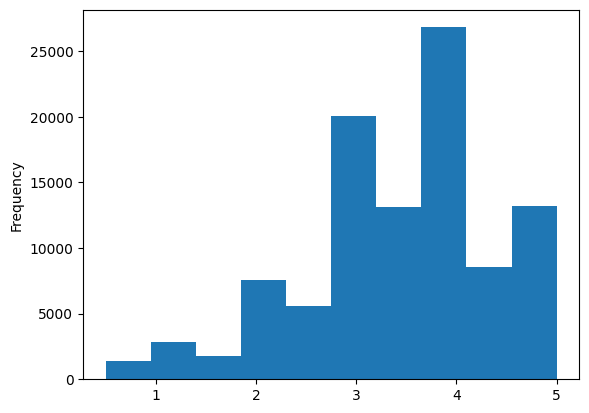

In [21]:
notas["Nota"].plot(kind="hist")

In [22]:
mediana = notas.Nota.median()
media = notas.Nota.mean()
print(f"Média: {media}")
print(f"Mediana: {mediana}")

Média: 3.501556983616962
Mediana: 3.5


In [23]:
notas.Nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

<Axes: ylabel='Nota'>

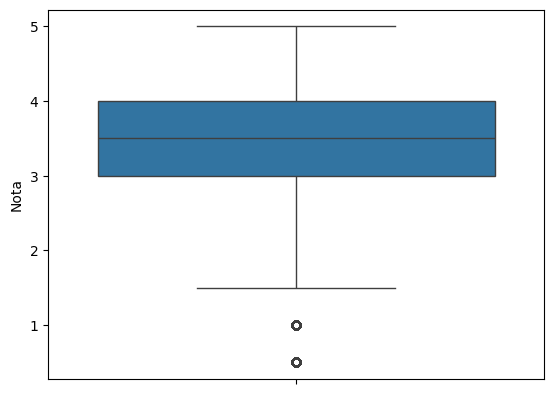

In [24]:
sns.boxplot(notas["Nota"])

In [25]:
notas.info()

<class 'pandas.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   usuarioId  100836 non-null  int64  
 1   filmeId    100836 non-null  int64  
 2   Nota       100836 non-null  float64
 3   momento    100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [28]:
filmes  = pd.read_csv("dados\\movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [30]:
notas.head()

,usuarioId,filmeId,Nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [37]:
notas.query("filmeId==1").Nota.mean()

np.float64(3.9209302325581397)

In [40]:
notas.query("filmeId==2").Nota.mean()

np.float64(3.4318181818181817)

In [43]:
mediasPorFilme = notas.groupby("filmeId").Nota.mean()
mediasPorFilme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

<Axes: ylabel='Frequency'>

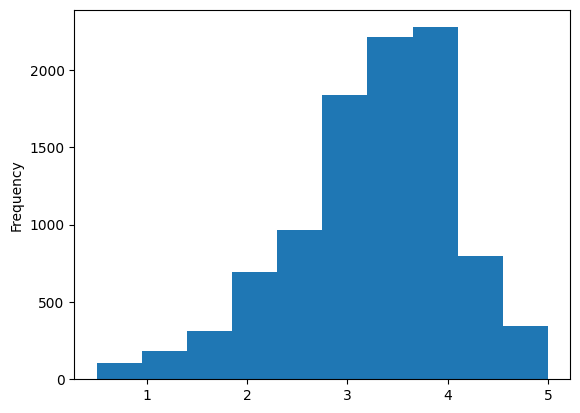

In [44]:
mediasPorFilme.plot(kind="hist")

<Axes: ylabel='Nota'>

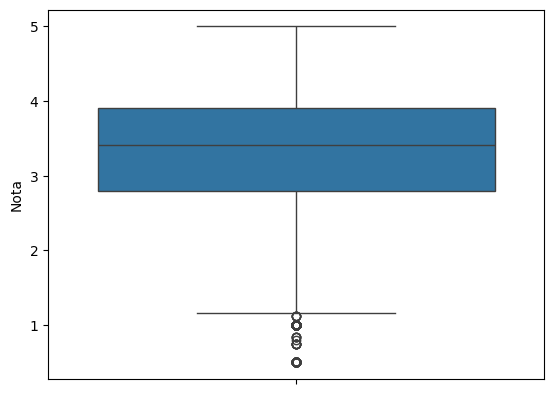

In [47]:
sns.boxplot(mediasPorFilme)

In [48]:
mediasPorFilme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Nota, dtype: float64

Text(0, 0.5, 'Quantidade de Pessoas')

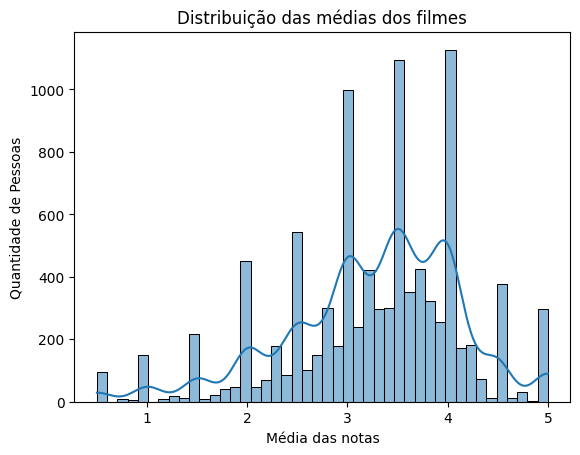

In [ ]:
sns.histplot(mediasPorFilme, kde=True)

# Formatando o gráfico
plt.title("Distribuição das médias dos filmes")
plt.xlabel("Média das notas")
plt.ylabel("Quantidade de Pessoas")